In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [19]:
one, two = pd.read_csv("churn-bigml-20.csv"), pd.read_csv("churn-bigml-80.csv")

df = pd.concat([one,two])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [20]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [23]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [27]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [25]:
df["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df["Voice mail plan"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df["International plan"] = df["International plan"].apply(lambda x: 1 if x == "Yes" else 0)
df["Voice mail plan"] = df["Voice mail plan"].apply(lambda x: 1 if x == "Yes" else 0)
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == True else 0)

In [29]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [32]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


<Axes: >

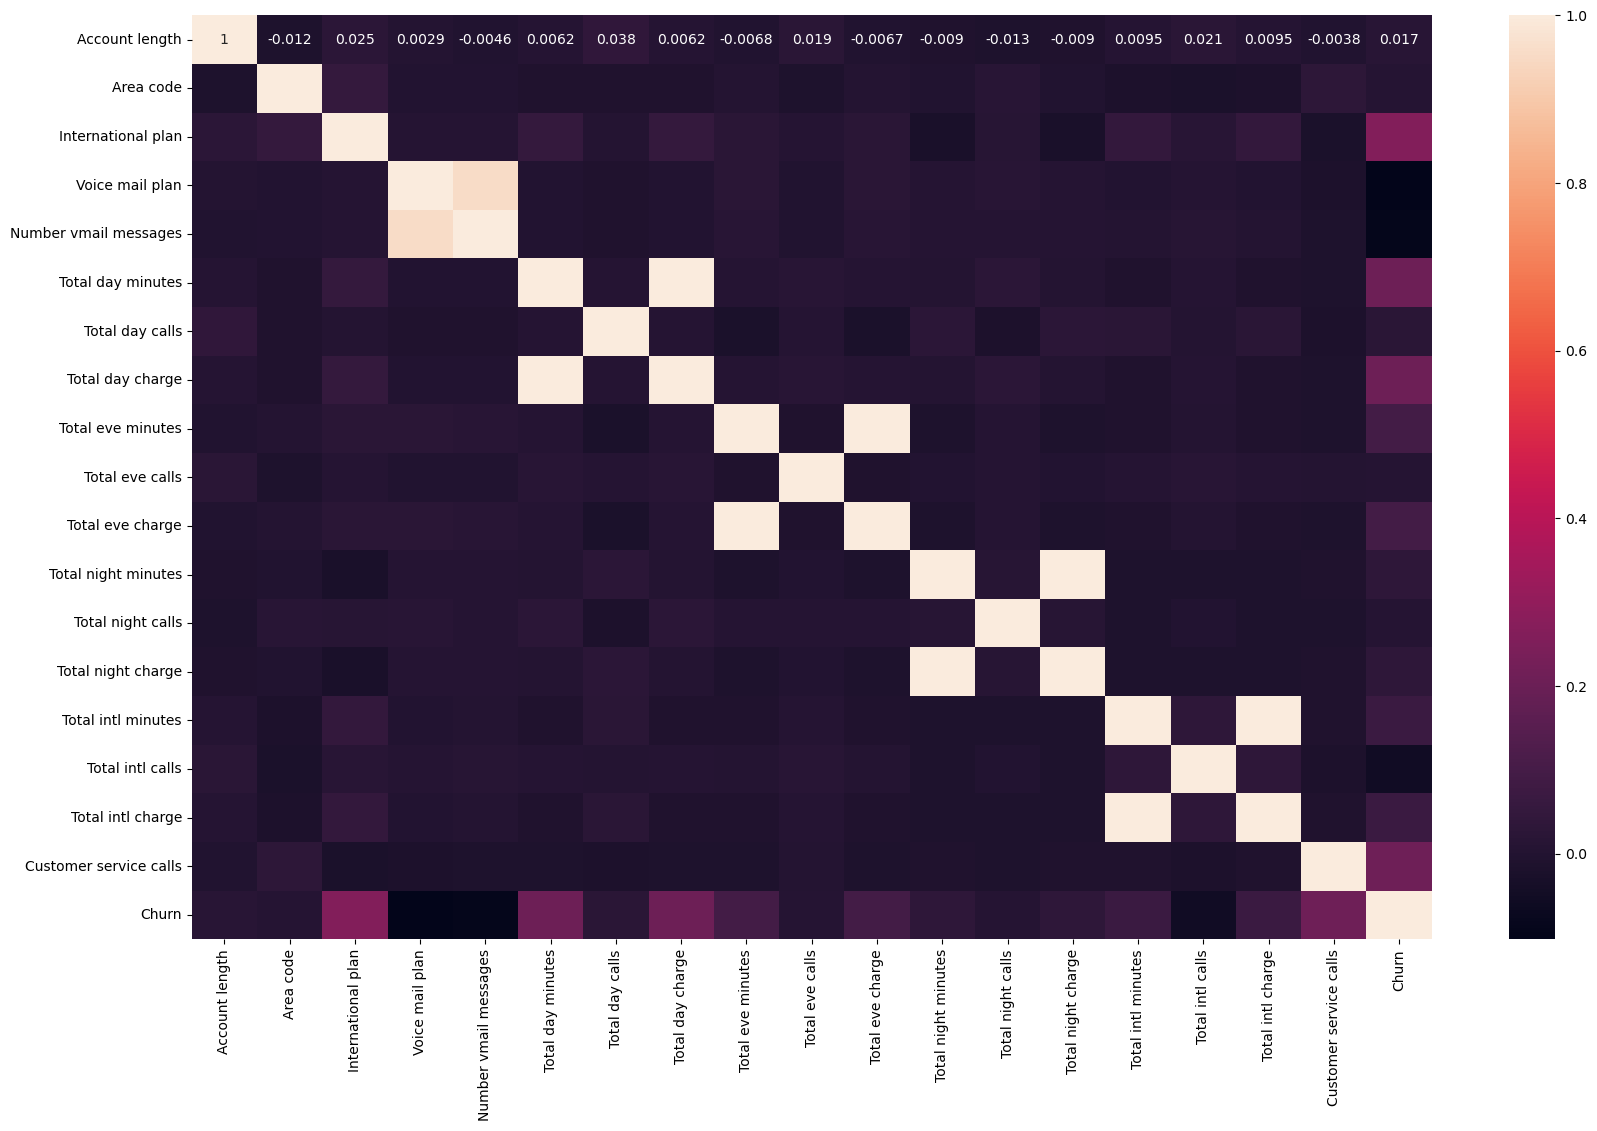

In [34]:
relations = df.drop("State", axis=1).corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=relations, annot=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/seaborn/_oldcore.py

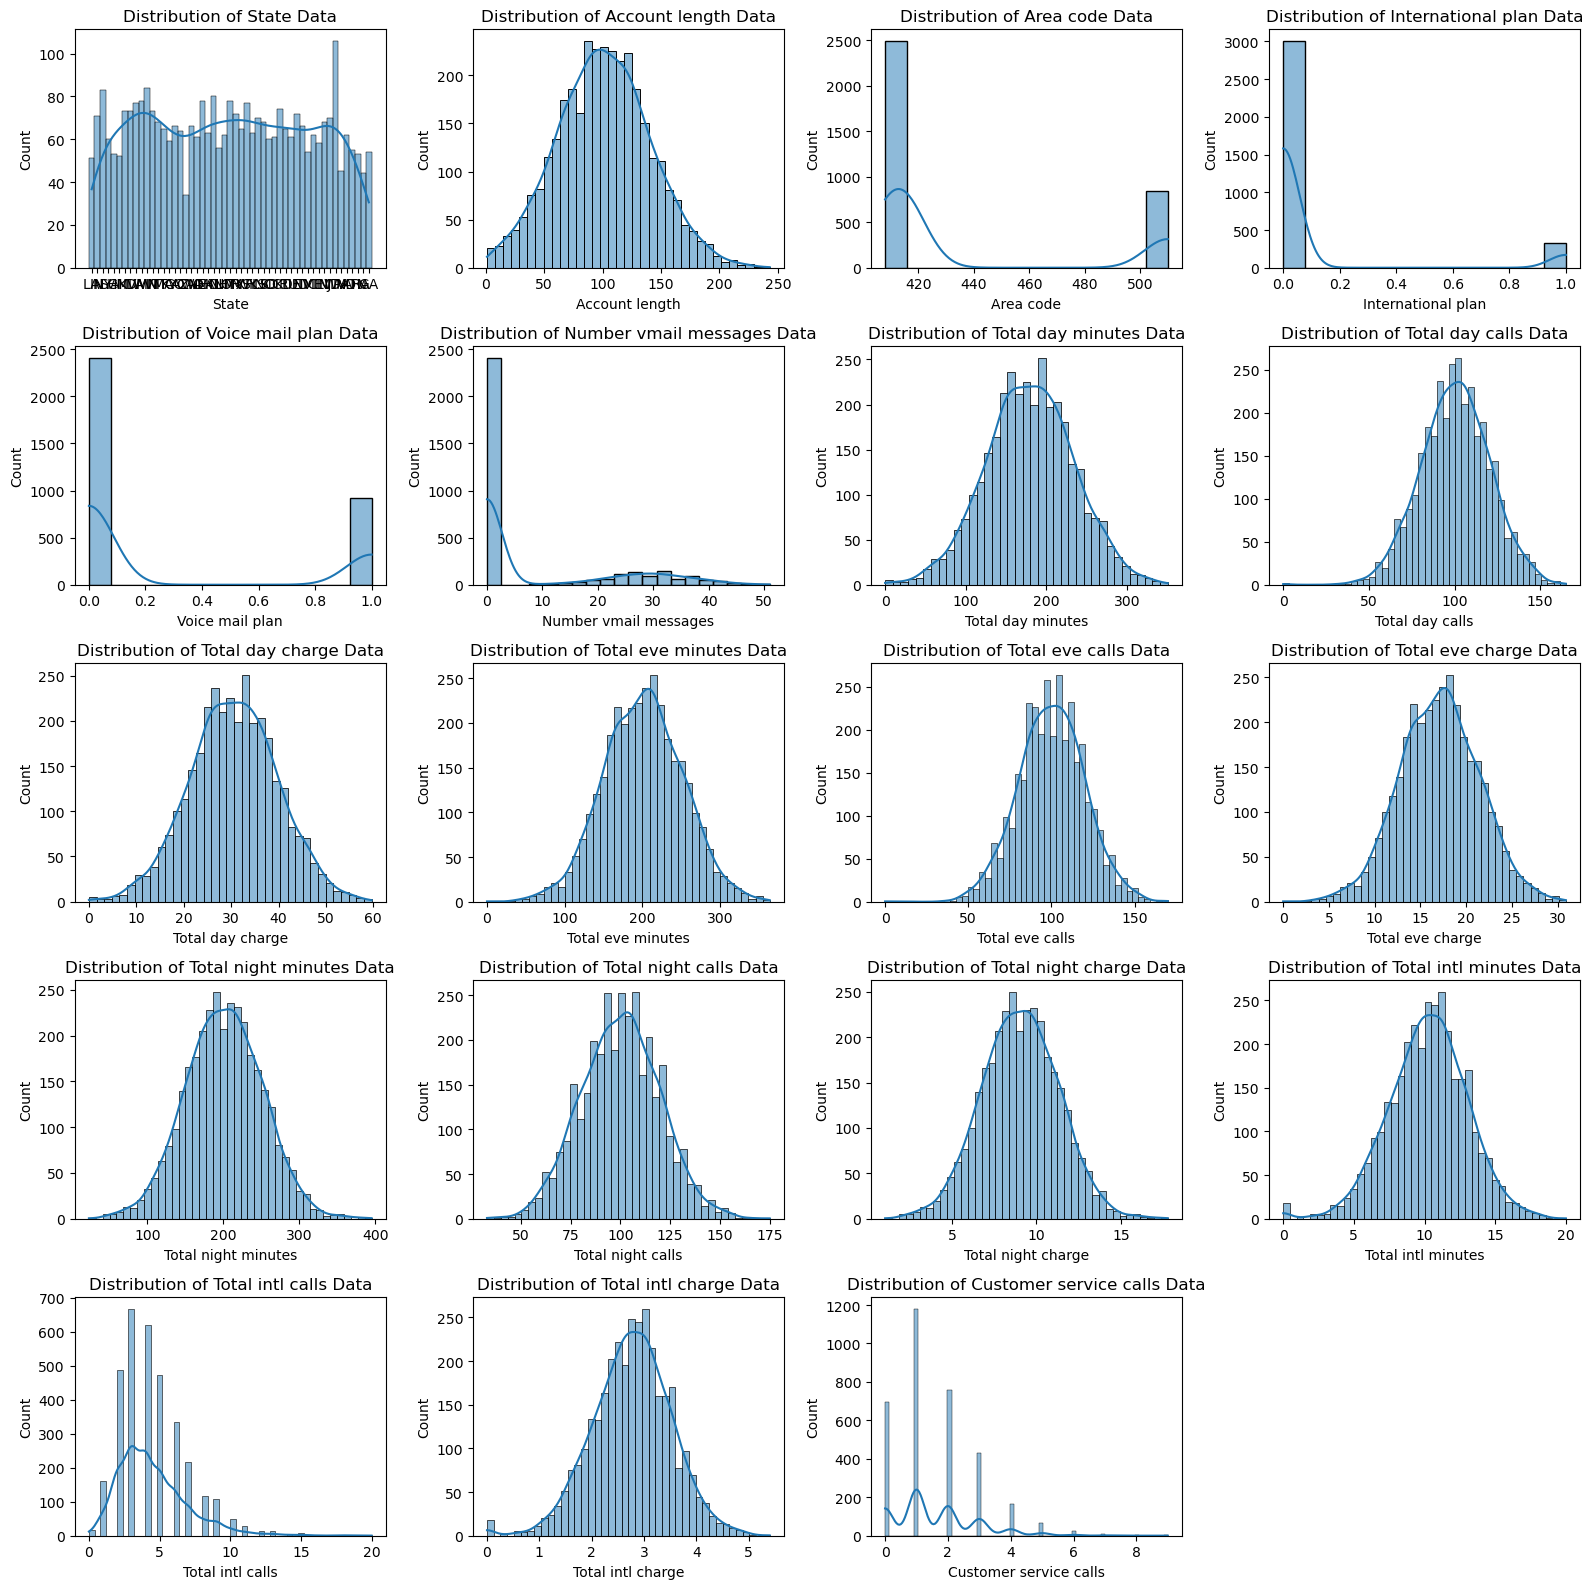

In [36]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

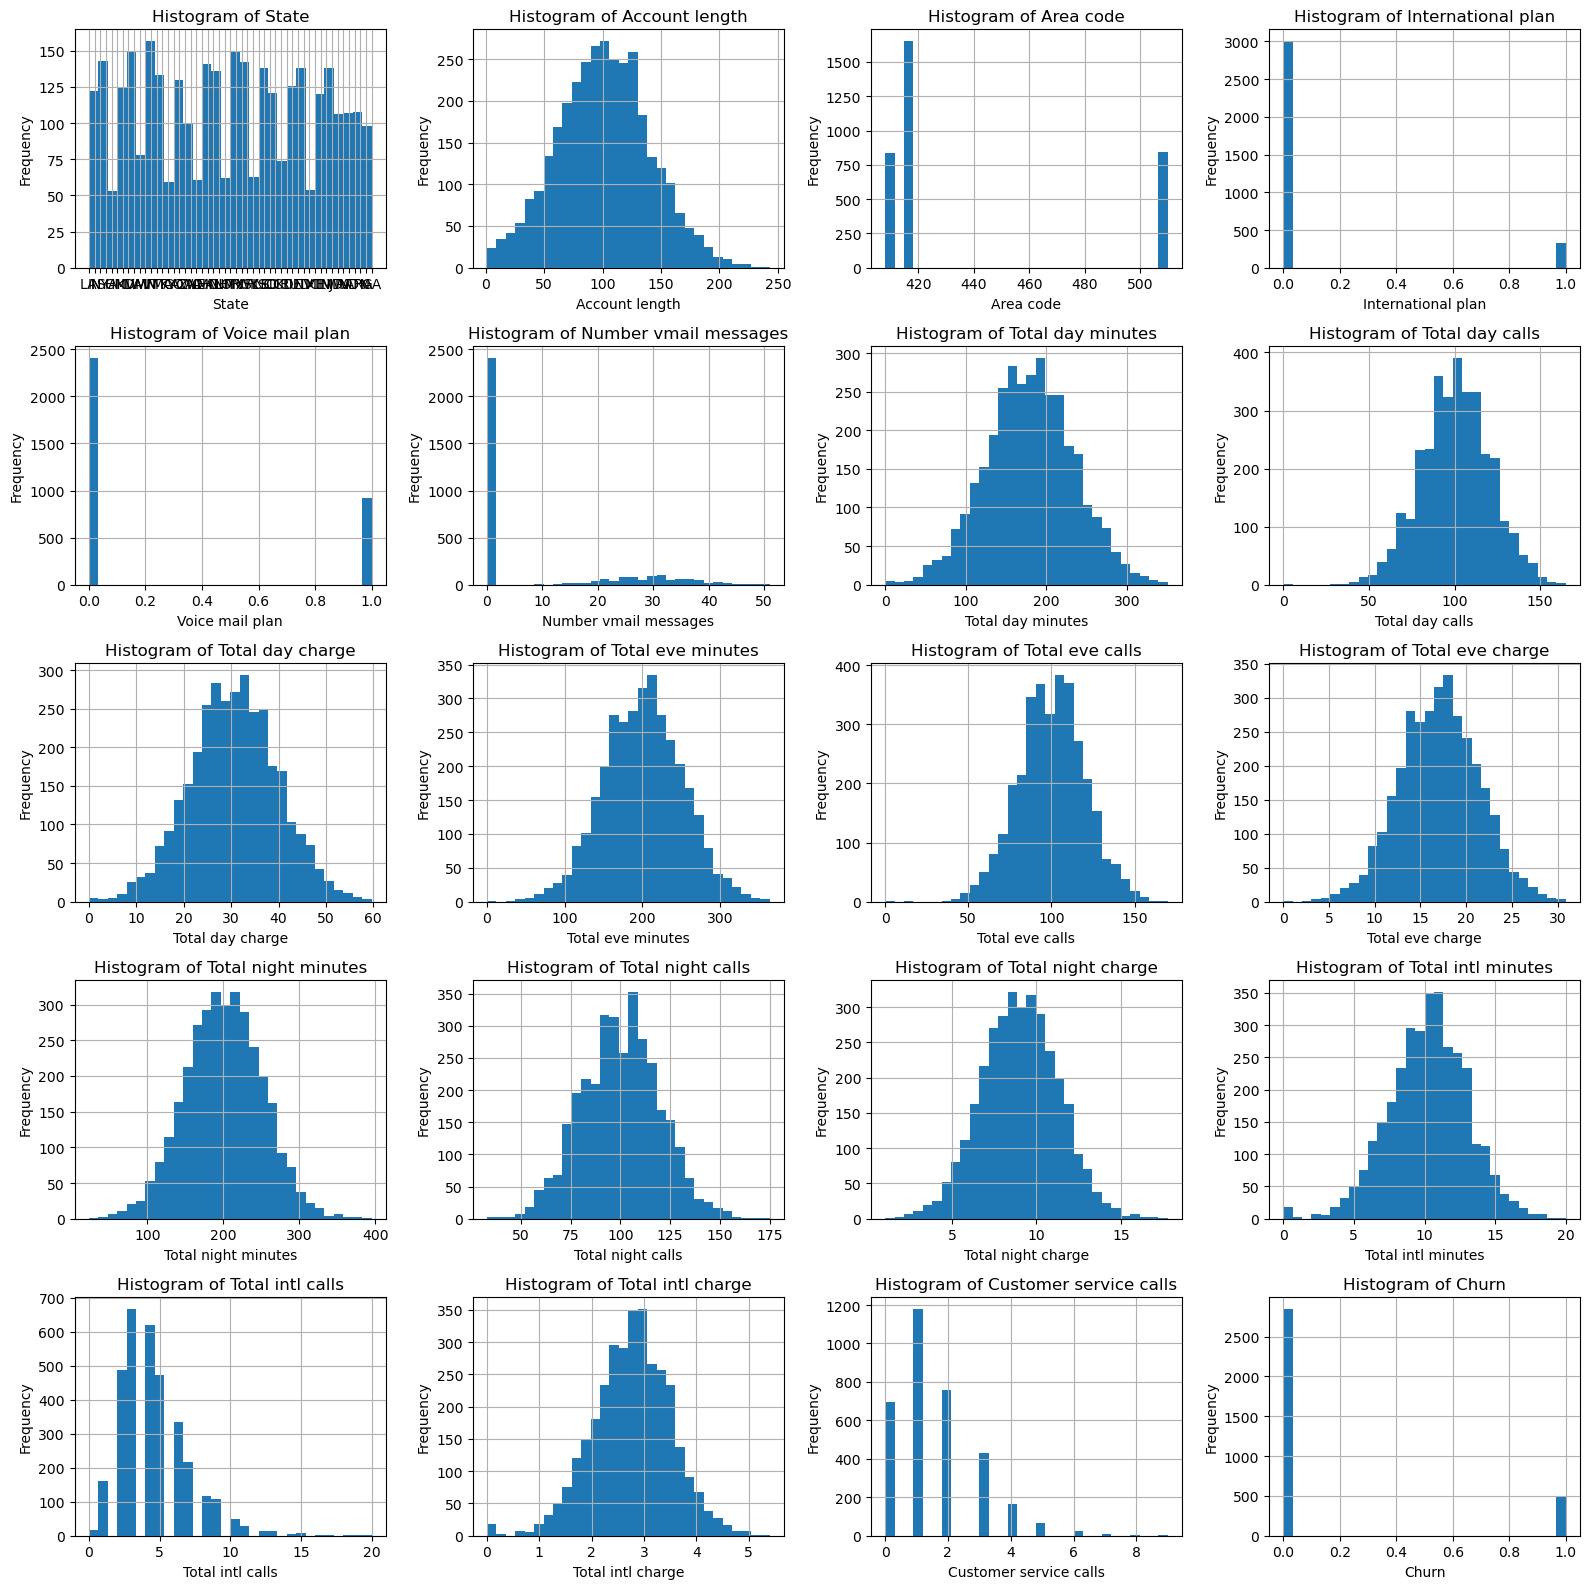

In [37]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns)  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up


for i, column in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    df[column].hist(bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.plot()

In [38]:
features_to_encode = ["State"]

# Instantiate the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[features_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))

# Reset index of your original DataFrame if it's not in default sequential order
df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Optionally, drop the original columns
df.drop(features_to_encode, axis=1, inplace=True)

/Users/test/miniforge3/envs/machine-learning-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [39]:
X, y = df.drop("Churn", axis=1), df["Churn"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.863568215892054
SVC Accuracy: 0.8710644677661169
DecisionTreeClassifier Accuracy: 0.9190404797601199
RandomForestClassifier Accuracy: 0.9430284857571214
KNeighborsClassifier Accuracy: 0.863568215892054
GradientBoostingClassifier Accuracy: 0.9535232383808095
GaussianNB Accuracy: 0.5337331334332833
Epoch 1/50
267/267 [==============================] - 1s 648us/step - loss: 0.4153 - accuracy: 0.8376
Epoch 2/50
267/267 [==============================] - 0s 494us/step - loss: 0.3246 - accuracy: 0.8661
Epoch 3/50
267/267 [==============================] - 0s 928us/step - loss: 0.2781 - accuracy: 0.8875
Epoch 4/50
267/267 [==============================] - 0s 595us/step - loss: 0.2392 - accuracy: 0.9156
Epoch 5/50
267/267 [==============================] - 0s 727us/step - loss: 0.2086 - accuracy: 0.9269
Epoch 6/50
267/267 [==============================] - 0s 562us/step - loss: 0.1857 - accuracy: 0.9321
Epoch 7/50
267/267 [==============================] - 0s 50

,Model,Accuracy
0,LogisticRegression,0.863568
1,SVC,0.871064
2,DecisionTreeClassifier,0.919040
3,RandomForestClassifier,0.943028
4,KNeighborsClassifier,0.863568
5,GradientBoostingClassifier,0.953523
6,GaussianNB,0.533733
7,Sequential,0.884558


In [40]:
X, y = df.drop("Churn", axis=1), df["Churn"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.863568215892054
SVC Accuracy: 0.8605697151424287
DecisionTreeClassifier Accuracy: 0.9190404797601199
RandomForestClassifier Accuracy: 0.9430284857571214
KNeighborsClassifier Accuracy: 0.8575712143928036
GradientBoostingClassifier Accuracy: 0.9535232383808095
GaussianNB Accuracy: 0.5337331334332833
Epoch 1/50
267/267 [==============================] - 0s 503us/step - loss: 0.4267 - accuracy: 0.8466
Epoch 2/50
267/267 [==============================] - 0s 512us/step - loss: 0.3593 - accuracy: 0.8593
Epoch 3/50
267/267 [==============================] - 0s 519us/step - loss: 0.3396 - accuracy: 0.8627
Epoch 4/50
267/267 [==============================] - 0s 499us/step - loss: 0.3272 - accuracy: 0.8635
Epoch 5/50
267/267 [==============================] - 0s 514us/step - loss: 0.3159 - accuracy: 0.8680
Epoch 6/50
267/267 [==============================] - 0s 644us/step - loss: 0.3079 - accuracy: 0.8713
Epoch 7/50
267/267 [==============================] - 0s 8

,Model,Accuracy
0,LogisticRegression,0.863568
1,SVC,0.860570
2,DecisionTreeClassifier,0.919040
3,RandomForestClassifier,0.943028
4,KNeighborsClassifier,0.857571
5,GradientBoostingClassifier,0.953523
6,GaussianNB,0.533733
7,Sequential,0.871064
